<a href="https://colab.research.google.com/github/KwadwoAntwi/Temporary_add_to_version_control/blob/master/Copy_of_perceptron_from_scratch_HelloAi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
iris = load_iris()

In [ ]:
type(iris)

sklearn.utils.Bunch

In [ ]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [ ]:
X = iris.data
y = iris.target

In [ ]:
print(X.shape, y.shape)

(150, 4) (150,)


In [ ]:
np.unique(y)

array([0, 1, 2])

In [ ]:
mask = np.where((y==0)|(y==1))
X = X[mask][:,[0,2]]
y = y[mask]

In [ ]:
print(X.shape, y.shape)

(100, 2) (100,)


In [ ]:
print(np.unique(y))

[0 1]


In [ ]:
setosas = X[np.where(y==0)]
versicolors = X[np.where(y==1)]

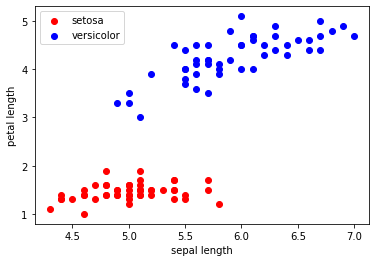

In [ ]:
plt.scatter(setosas[:,0], setosas[:,1], color="r", label="setosa")
plt.scatter(versicolors[:,0], versicolors[:,1], color="b", label="versicolor")
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend()

In [ ]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.25, shuffle=True)

In [ ]:
print(Xtrain.shape, ytrain.shape)
print(Xtest.shape, ytest.shape)

(75, 2) (75,)
(25, 2) (25,)


In [ ]:
import sys

class Perceptron:
  def __init__(self, input_dim):
    self.weights = np.random.normal(loc=0.0, scale=1.0, size=input_dim)
    self.bias = np.random.normal(loc=0.0, scale=1.0, size=1)

  def activation(self, yhat):
    return np.where(yhat >= 0, 1,0)

  def predict(self, data):
    return self.activation(np.dot(data, self.weights.T))

  def accuracy(self, features, targets):
    predictions = self.predict(features)
    return (predictions == targets).mean()

  def train(self, xtrain, ytrain, xtest, ytest, epochs=100, lr=0.01):
    losses = []
    train_accuracies = []
    test_accuracies = []
    for e in range(1, epochs + 1):
      epoch_loss = 0.0
      predictions = []
      for data, target in zip(xtrain, ytrain):
        pred = self.predict(data)
        error = target - pred
        update = lr * error
        epoch_loss += error ** 2
        self.weights += update * data
        self.bias += update

      train_acc = self.accuracy(xtrain, ytrain)
      test_acc = self.accuracy(xtest, ytest)
      train_accuracies.append(train_acc)
      test_accuracies.append(test_acc)
      losses.append(epoch_loss)

      print(f"\rEpoch {e}/{epochs}, Loss : {epoch_loss}, Train Acc : {train_acc}, Test Acc : {test_acc}", end="")
      sys.stdout.flush()

    return {"losses": losses, "train_acc": train_accuracies, "test_acc": test_accuracies}

In [ ]:
model = Perceptron(input_dim=2)
history = model.train(Xtrain, ytrain, Xtest, ytest, epochs=20, lr=0.001)

Epoch 20/20, Loss : 0.0, Train Acc : 1.0, Test Acc : 1.0

In [ ]:
print(model.weights, model.bias)

[-0.08223768  0.14471034] [0.23337123]


Text(0, 0.5, 'Accuracy')

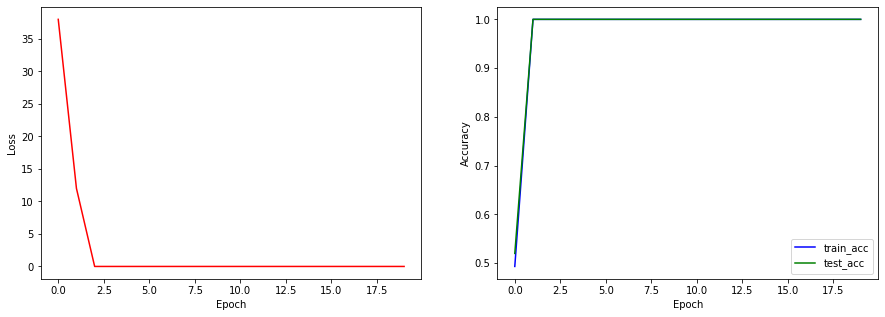

In [ ]:
fig = plt.figure(figsize=[15,5])
ax1 = fig.add_subplot(121)
ax1.plot(history["losses"][:20], c="r")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")

ax2 = fig.add_subplot(122)
ax2.plot(history["train_acc"], c="b", label="train_acc")
ax2.plot(history["test_acc"], c="g", label="test_acc")
ax2.legend()
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Accuracy")

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


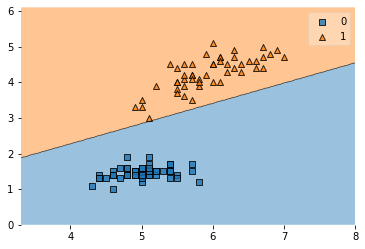

In [ ]:
from mlxtend.plotting import plot_decision_regions
_ = plot_decision_regions(X, y, clf=model)